# Overview of visualization options

This tutorial gives a comprehensive overview of in-built visualization functions and options. 

Content:
1. Model & training
	- Model weight visualization
	- Loss curves
2. Latent space
	- Heatmap representation
	- Ridgeline representation
	- 2D representation
	- Coverage and total correlation
3. Embedding evaluation
	- Performance comparison via bar plots
4. Saving and customization
5. XModalix and Imagix specialities
	- Differences in standard visualizations
	- Input vs. translation 2D check
	- Visualizing image translation capabilities


## 1. Model & training
We provide a heatmap representation of model weights and loss curves over epochs to gain insights into the autoencoder training and debugging.

Model weight visualization is limited to small models (input features <3000) for computational and visual reasons. 

Let us start with a Disentanglix to show model weight and loss curve plotting. 

In [1]:
from autoencodix.utils.example_data import EXAMPLE_MULTI_BULK
from autoencodix.configs.disentanglix_config import DisentanglixConfig
from autoencodix.configs.default_config import DataCase
import autoencodix as acx


my_cfg = DisentanglixConfig(
	data_case=DataCase.MULTI_BULK,
	loss_reduction="sum",
	k_filter=500,
	latent_dim=6,
	scaling="STANDARD",
	epochs=100,
	learning_rate=0.001,
	batch_size = 128,
	beta_mi = 10,
	beta_tc = 500,
	beta_dimKL= 0.5,
	use_mss = True,
	drop_p =0.1,
	global_seed=42,
	checkpoint_interval=1,
	n_layers=1)

disent = acx.Disentanglix(data=EXAMPLE_MULTI_BULK, config=my_cfg)

result = disent.run()

in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>
anno key: transcriptomics
anno key: proteomics


/home/ewald/Github/autoencodix_package/src/autoencodix/data/_filter.py:103: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/data/_filter.py:103: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Epoch 1 - Train Loss: 216.3924
Sub-losses: recon_loss: 216.3916, mut_info_loss: 0.0003, tot_corr_loss: 0.0005, dimwise_kl_loss: 0.0000, anneal_factor: 0.0000, effective_beta_mi_factor: 0.0005, effective_beta_tc_factor: 0.0227, effective_beta_dimKL_factor: 0.0000
Epoch 1 - Valid Loss: 187.3690
Sub-losses: recon_loss: 187.3677, mut_info_loss: 0.0004, tot_corr_loss: 0.0010, dimwise_kl_loss: 0.0000, anneal_factor: 0.0000, effective_beta_mi_factor: 0.0005, effective_beta_tc_factor: 0.0227, effective_beta_dimKL_factor: 0.0000
Epoch 2 - Train Loss: 211.7542
Sub-losses: recon_loss: 211.7535, mut_info_loss: 0.0003, tot_corr_loss: 0.0003, dimwise_kl_loss: 0.0000, anneal_factor: 0.0001, effective_beta_mi_factor: 0.0006, effective_beta_tc_factor: 0.0277, effective_beta_dimKL_factor: 0.0000
Epoch 2 - Valid Loss: 190.5313
Sub-losses: recon_loss: 190.5297, mut_info_loss: 0.0005, tot_corr_loss: 0.0011, dimwise_kl_loss: 0.0001, anneal_factor: 0.0001, effective_beta_mi_factor: 0.0006, effective_beta_tc_

After conducting the pipeline with `.run()`, the pipeline function `.visualize()` is already called and created the plots for model weights and loss curves.

We have now three ways to display them:
- Loss curves, but not model weights, are part of the general `show_result()` function. 
- Specific display functions for loss `show_loss()` and model weights `show_weights()`
- accessing figure handles stored in `disent.visualizer.plots` dictionary

Creating plots ...


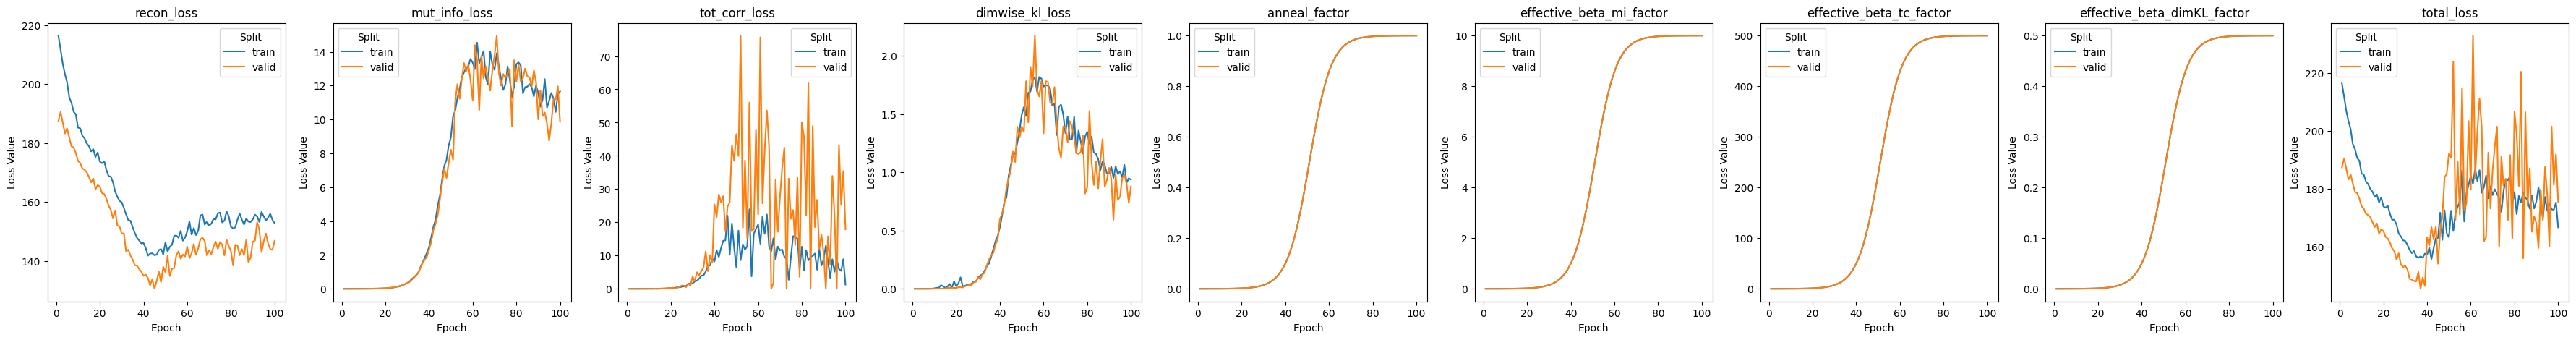

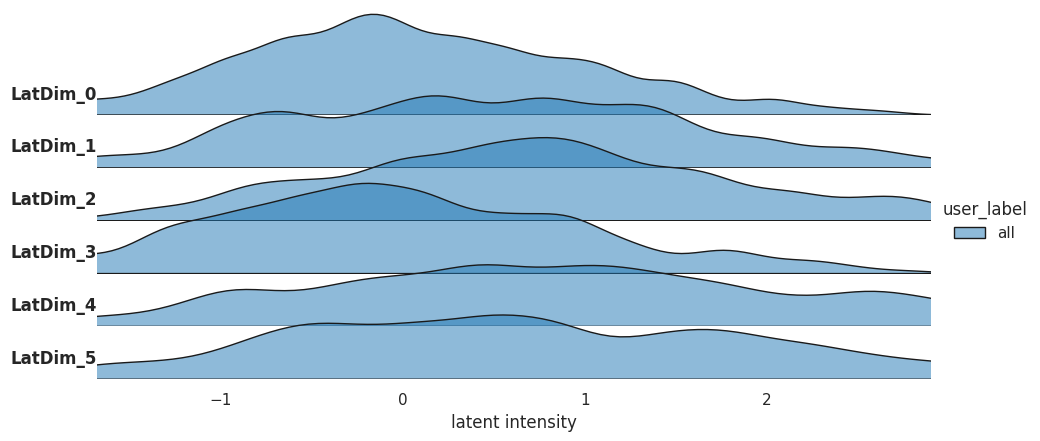

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


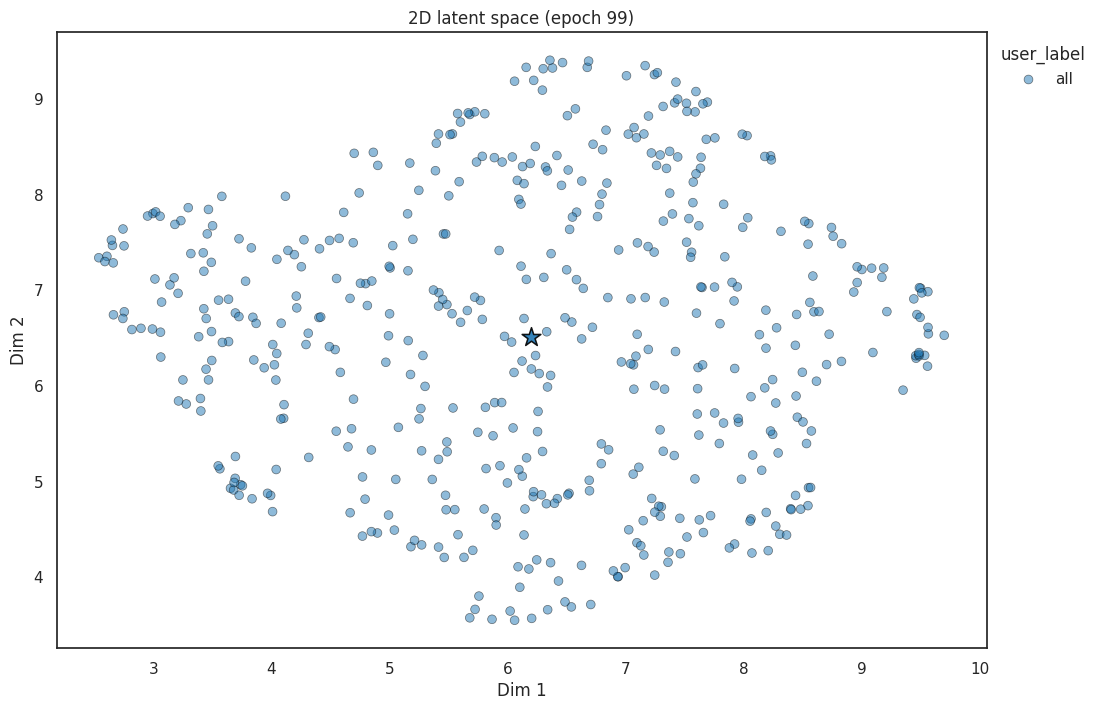

In [2]:
# Using show_result
disent.show_result()

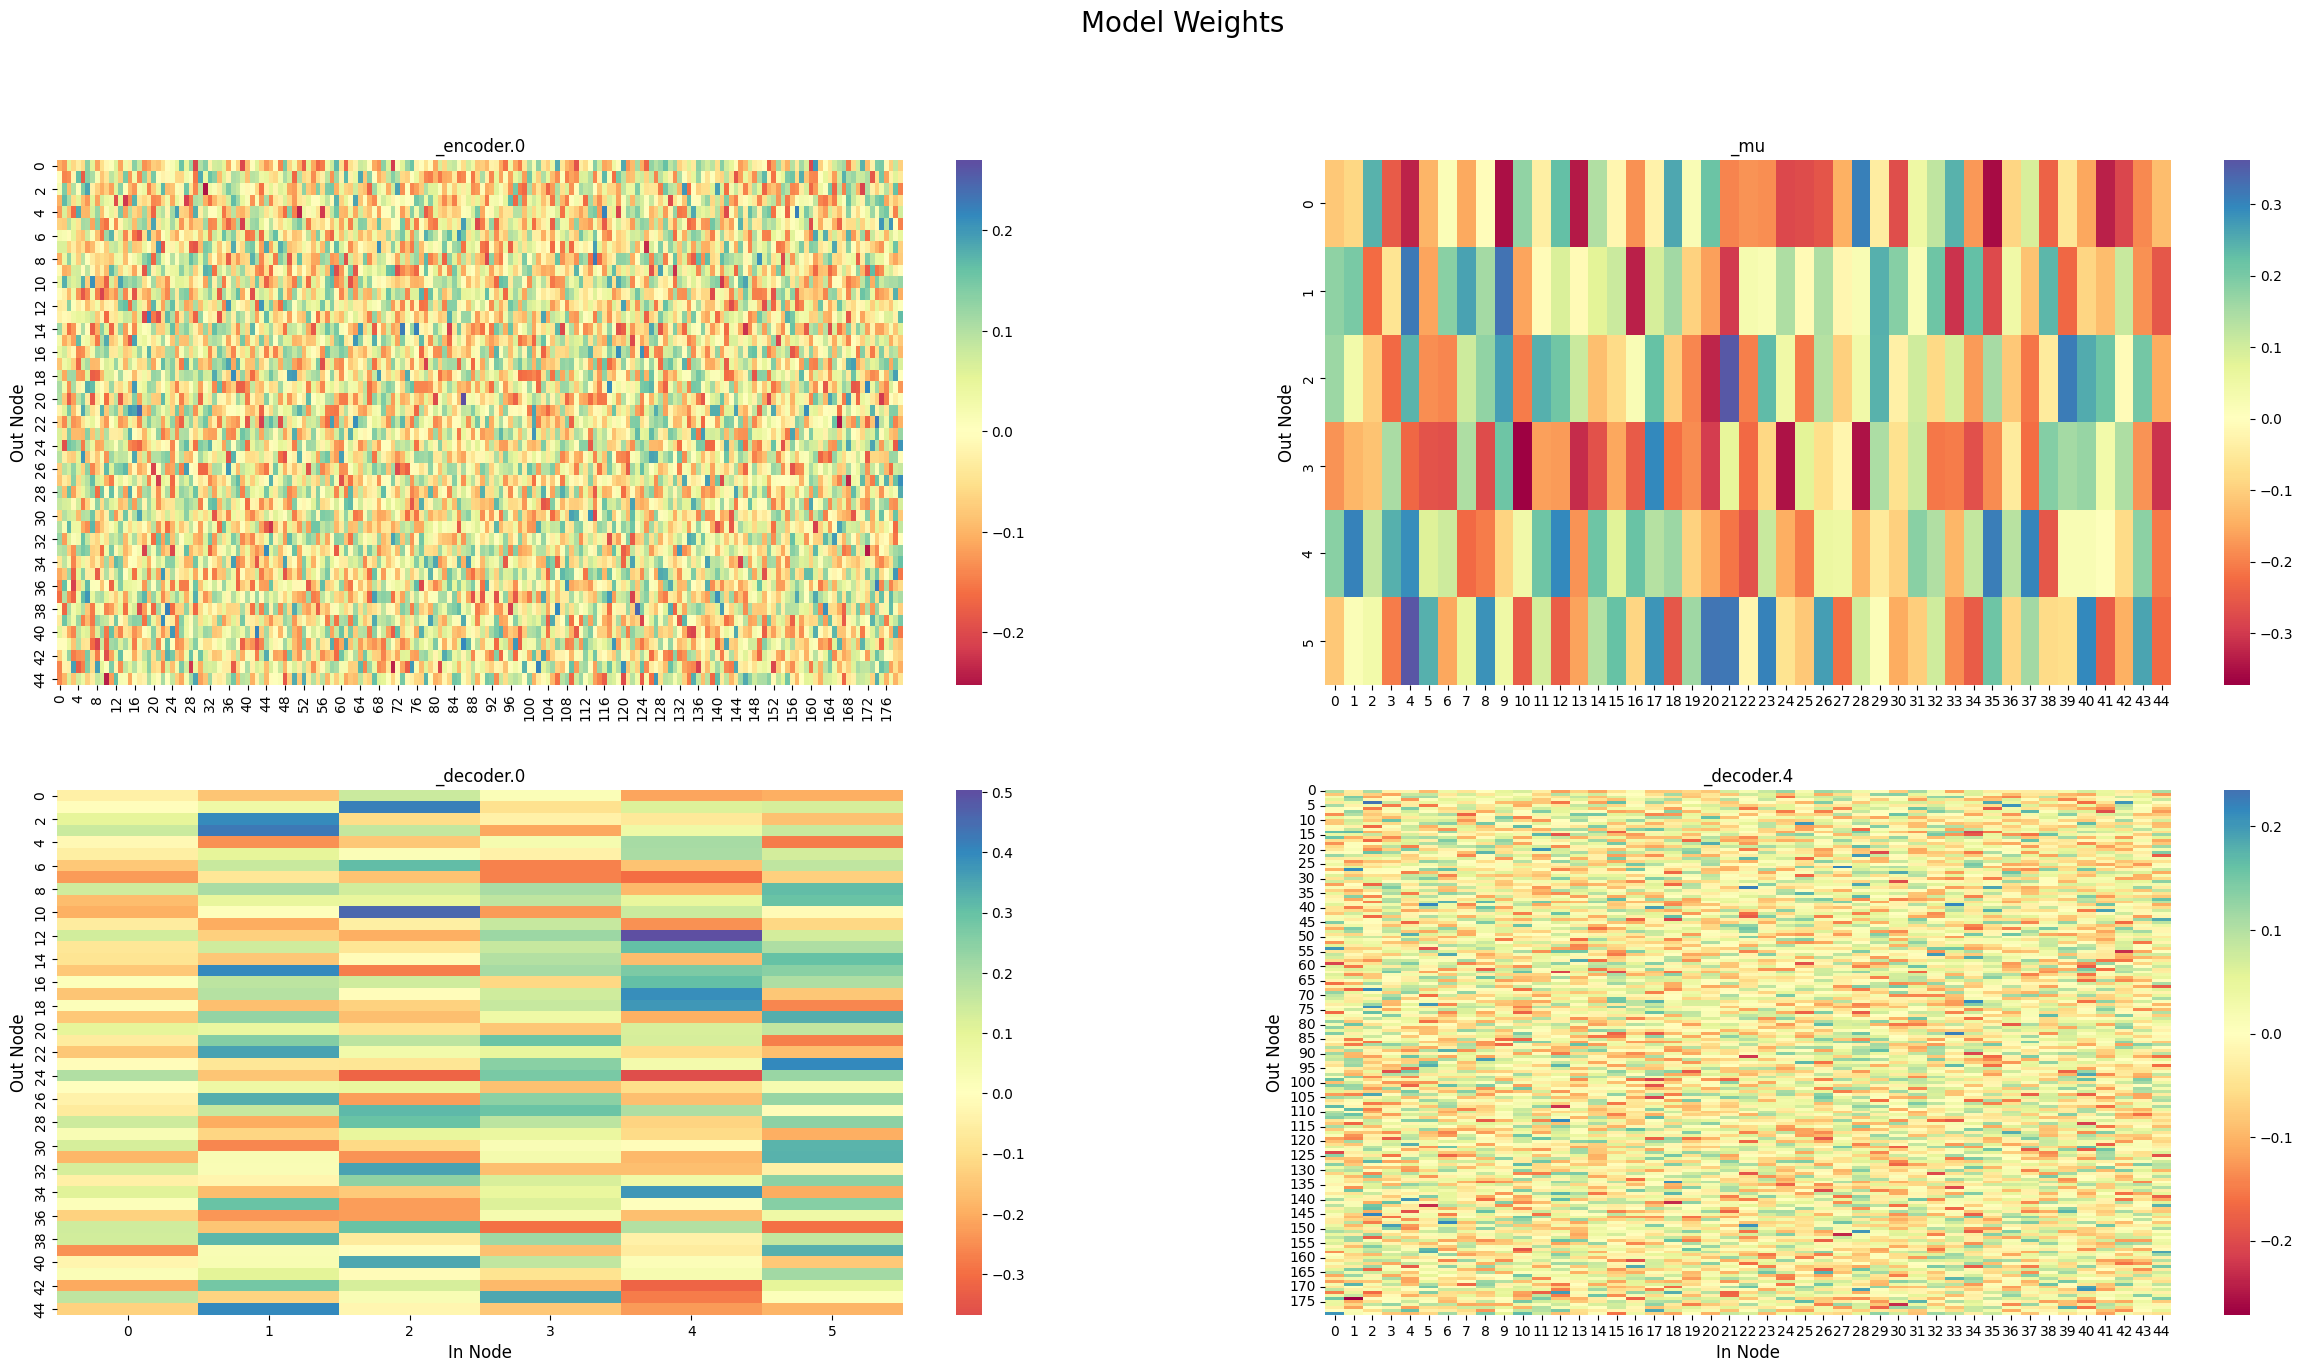

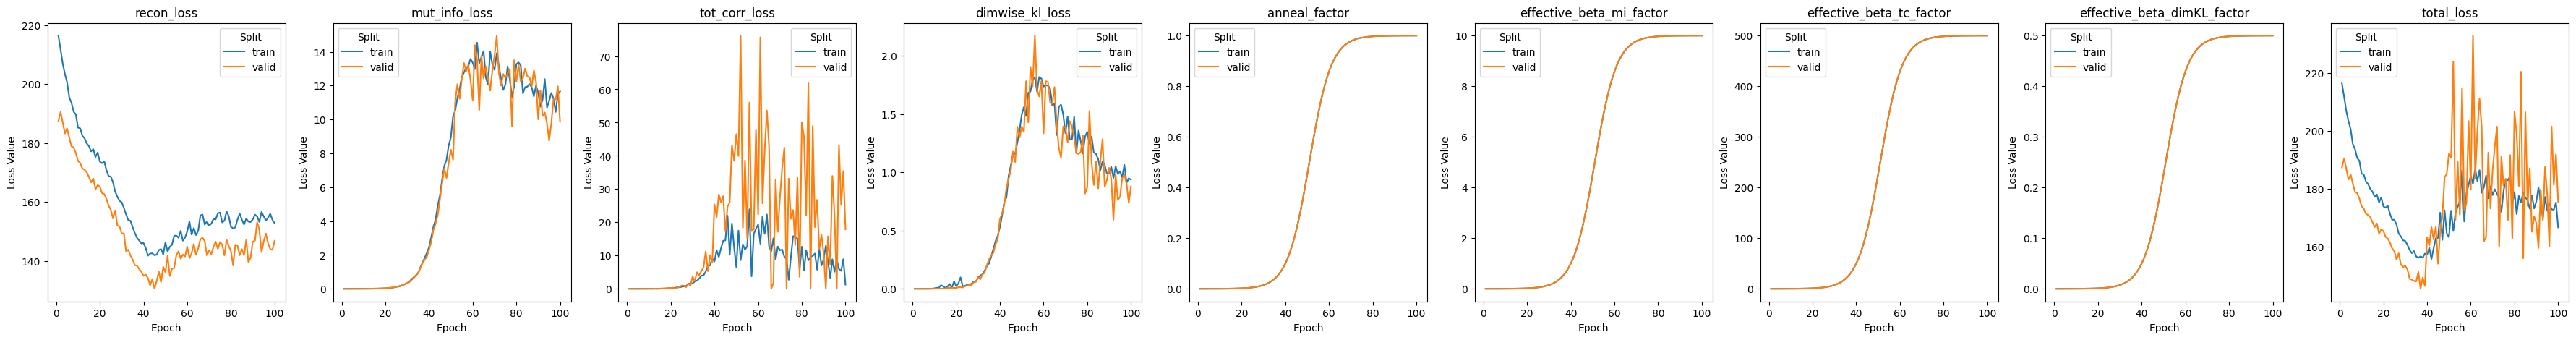

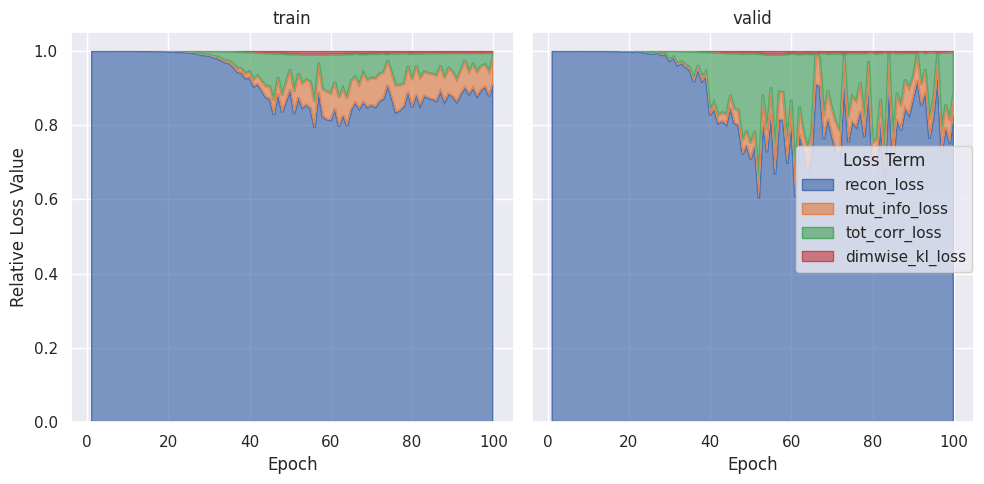

In [3]:
# Using specific display functions via disent.visualizer
fig_weights = disent.visualizer.show_weights()
fig_loss_abs = disent.visualizer.show_loss(plot_type="absolute") # Displays all loss components and factors over epochs
fig_loss_rel = disent.visualizer.show_loss(plot_type="relative") # Displays contribution of loss components to total loss over epochs

In [4]:
# All figure handles are also accessible via disent.visualizer.plots dictionary
disent.visualizer.plots

defaultdict(<function autoencodix.utils._utils.nested_dict()>,
            {'ModelWeights': <Figure size 3000x1500 with 8 Axes>,
             'loss_absolute': <Figure size 4500x500 with 9 Axes>,
             'loss_relative': <seaborn._core.plot.Plot at 0x75b8204894e0>,
             'Ridgeline': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                         {99: defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                      {'all': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                                   {'user_label': <seaborn.axisgrid.FacetGrid at 0x75b81bbdf730>})})}),
             '2D-scatter': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                         {99: defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                      {'all': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                           

## 2. Latent space visualization
We offer different views on the latent space for different tasks and insights which are all accessible via `show_latent_space()` and the options `plot_type=`:
- `2D-scatter` - Uses UMAP as dimension reduction if `latent_dim>2` to display a 2D scatter (samples) plot representation of the latent space
- `Ridgeline` - Distributions (per sample class) of latent intensities for each latent dimension
- `Clustermap`- Heatmap of meant latent intensities per sample class and latent dimension. Classes are clustered by correlation along latent dimensions. 
- `Coverage-Correlation` - Displays average coverage and total correlation across latent dimensions to inspect denseness and disentanglement over epochs.

In [5]:
disent._datasets.test.metadata

{'transcriptomics':               condition    batch  quality_score
 sample_1    condition_0  batch_2       0.884084
 sample_100  condition_2  batch_1       0.714076
 sample_103  condition_2  batch_3       0.914741
 sample_105  condition_1  batch_2       0.826505
 sample_107  condition_2  batch_2       0.969119
 ...                 ...      ...            ...
 sample_78   condition_0  batch_1       0.924776
 sample_85   condition_0  batch_2       0.724113
 sample_89   condition_0  batch_1       0.993631
 sample_92   condition_2  batch_1       0.747582
 sample_98   condition_0  batch_1       0.703970
 
 [100 rows x 3 columns],
 'proteomics':               condition    batch  quality_score
 sample_1    condition_0  batch_2       0.884084
 sample_100  condition_2  batch_1       0.714076
 sample_103  condition_2  batch_3       0.914741
 sample_105  condition_1  batch_2       0.826505
 sample_107  condition_2  batch_2       0.969119
 ...                 ...      ...            ...
 sample_7

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


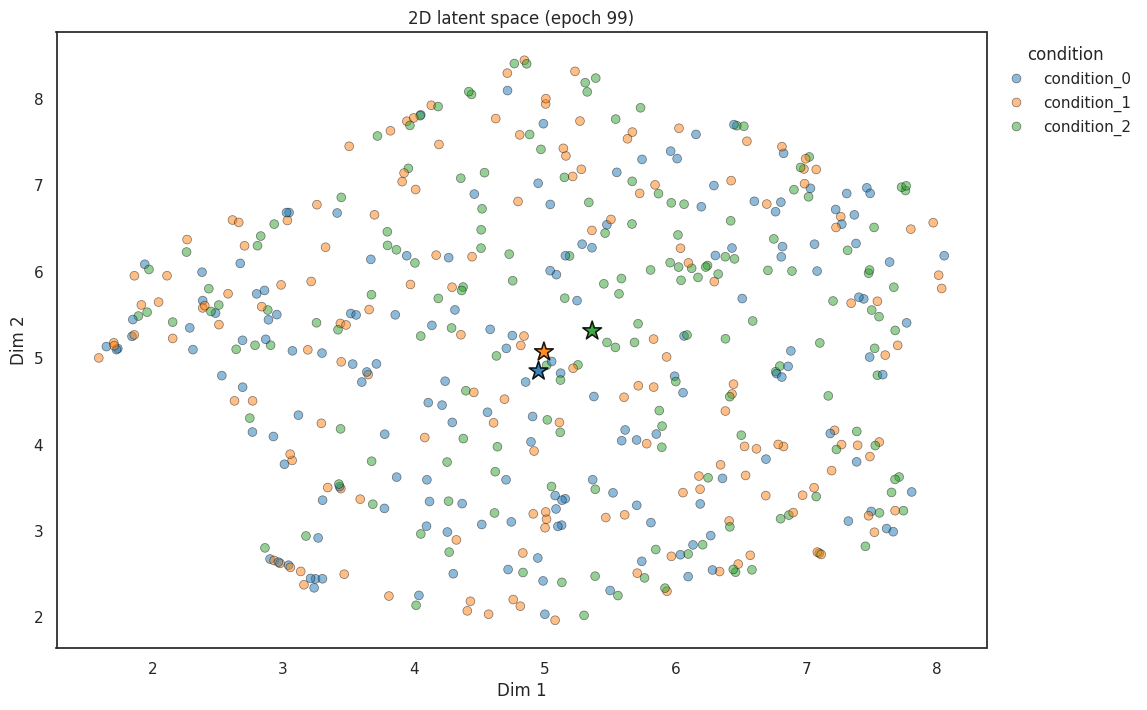

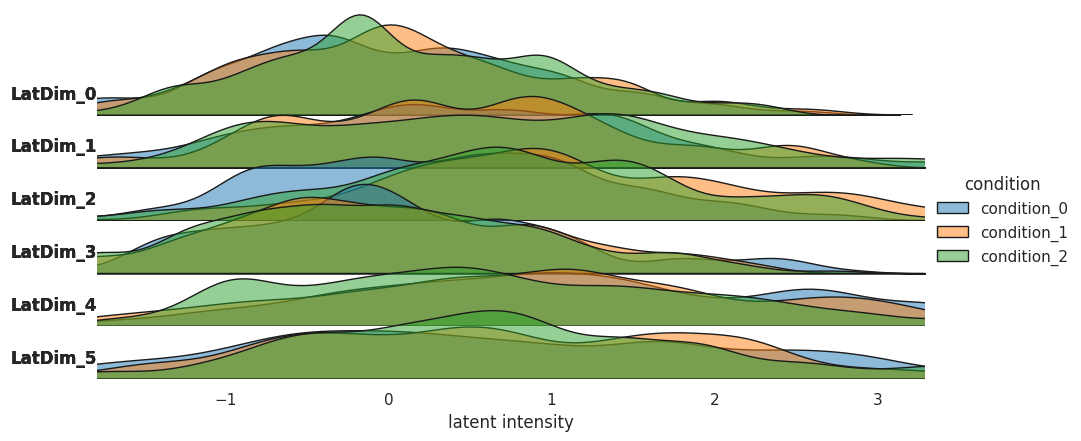

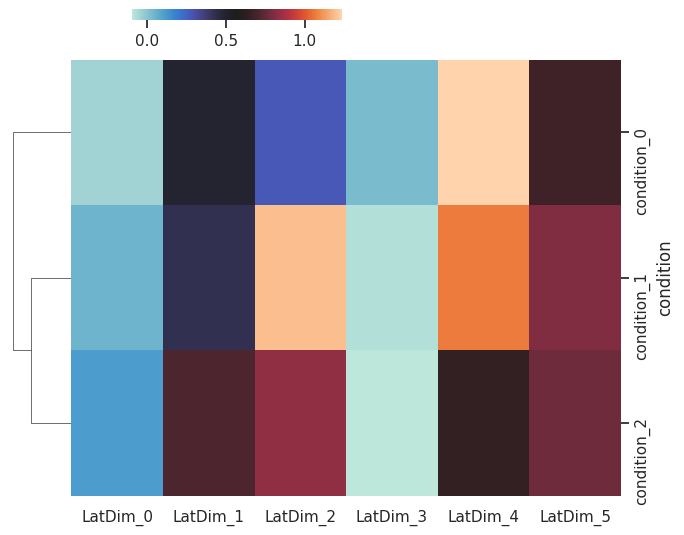

In [6]:
params = ["condition"] # Specify metadata parameters to color/label the plots

fig_latent_2D = disent.visualizer.show_latent_space(result=result, plot_type="2D-scatter", param=params)
fig_latent_ridge = disent.visualizer.show_latent_space(result=result, plot_type="Ridgeline", param=params)
fig_latent_clustermap = disent.visualizer.show_latent_space(result=result, plot_type="Clustermap", param=params)

/home/ewald/Github/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:788: UserWarning: Coverage calculation fails since combination of sample size and latent dimension results in less than 2 bins.
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:788: UserWarning: Coverage calculation fails since combination of sample size and latent dimension results in less than 2 bins.
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:788: UserWarning: Coverage calculation fails since combination of sample size and latent dimension results in less than 2 bins.
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:788: UserWarning: Coverage calculation fails since combination of sample size and latent dimension results in less than 2 bins.
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/visualize/_ge

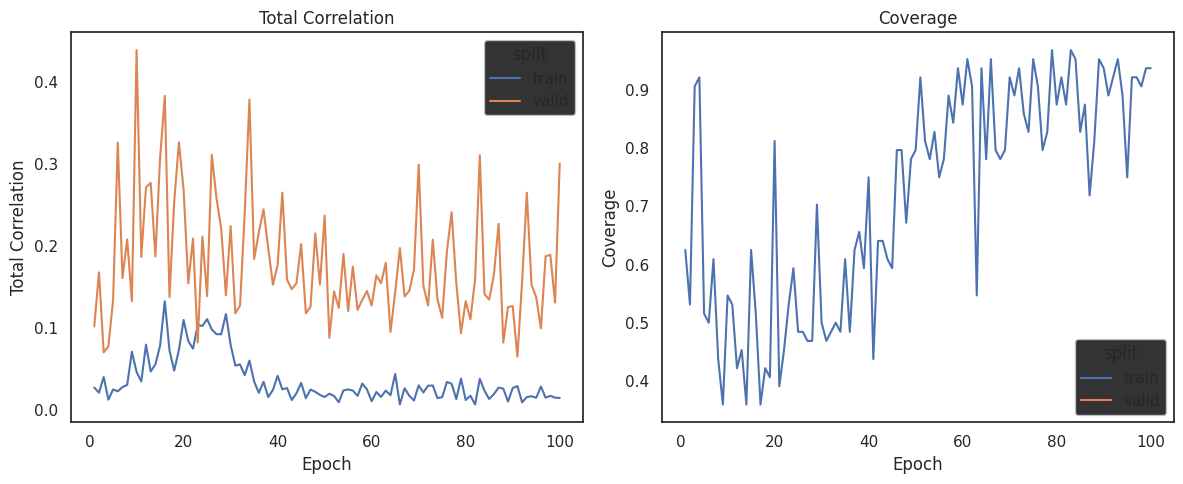

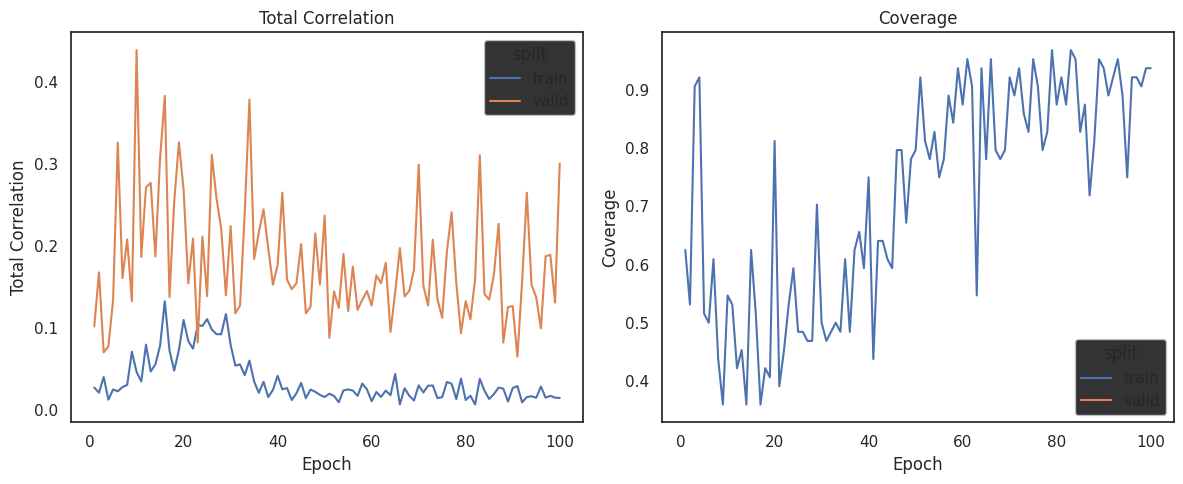

In [7]:
# To increase resolution over epochs, set the config parameter 'checkpoint_interval=1' before training
fig_latent_cov_tc = disent.visualizer.show_latent_space(result=result, plot_type="Coverage-Correlation")
# TODO Coverage calculation fails for small valid split

### Advanced options in latent space visualization
For a deep analysis of the latent space we offer additional options in `show_latent_space()`:
- `param` - List of parameters to color plots and already provided as metadata before training. Strings must match column names. If not a list, string "all" is expected for convenient way to make plots for all parameters available. 
- `labels` - List or pd.Series of labels of each sample to color the latent space. If provided as list this must match the order of samples.
- You can use instead the config parameter `annotation_columns` to specify a default list of parameters to be used for plotting
- `split` - The data split to visualize. Options are "train", "valid", "test", and "all". Default is "all".
- `epoch` - The epoch number to visualize. If None, the last epoch is used (default). Warning: this only works for epochs which are checkpointed, see config parameter `checkpoint_interval`.

Example: we want to display the latent space at the very beginning of the training only for samples in the `train` split. 

Further, we have new labels which we will provide as a pd.Series.

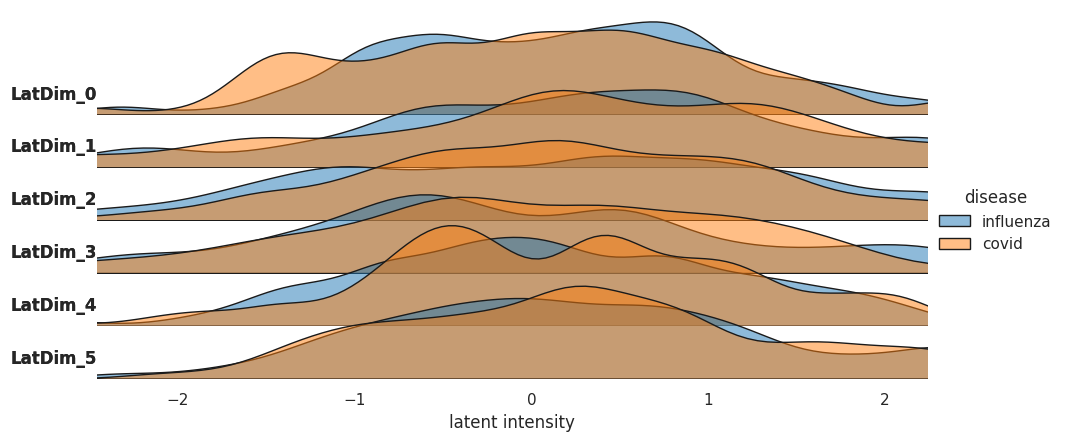

In [8]:
import pandas as pd
disease_labels = ["influenza"] * (len(disent._datasets.train.sample_ids)//2) + ["covid"] * (len(disent._datasets.train.sample_ids)//2) 
train_samples = pd.Series(data=disease_labels, index=disent._datasets.train.sample_ids, name="disease")

fig_latent_epoch0 = disent.visualizer.show_latent_space(
	result=result,
	plot_type="Ridgeline",
	labels=train_samples,
	split="train",
	epoch=0
)

# 3. Embedding evaluation
Check out the Evaluate Tutorial for a deep dive into how to do the evaluation.

Here, is a quick example on how to plot the results after embedding evaluation.

In [9]:
# Perform embedding evaluation (not part of .run())
params = ["condition", "batch"]
result = disent.evaluate(params=params)



Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: condition
Perform ML task for target parameter: batch


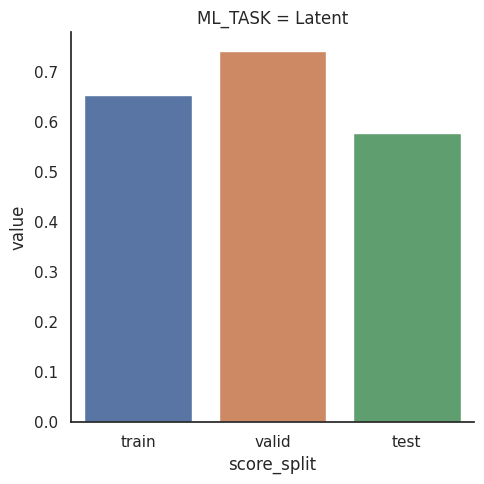

In [14]:
from sklearn.linear_model import LogisticRegression

fig_condition_eval = disent.visualizer.show_evaluation(
	param=params[0], # We plot one parameter at a time
	metric="roc_auc_ovo", # This is the default metric for classification tasks
	ml_alg=str(LogisticRegression()) # This is the default ML algorithm for classification tasks
)

# 4. Saving and customization

## Saving
All plots in the dictionary in `disent.visualizer.plots` can be saved via the function `save_plots()`. 

In case you only want to save a subset, you can use the option `which` and provide a list of plots to be saved.

In [11]:
# All available plots
disent.visualizer.plots

defaultdict(<function autoencodix.utils._utils.nested_dict()>,
            {'ModelWeights': <Figure size 3000x1500 with 8 Axes>,
             'loss_absolute': <Figure size 4500x500 with 9 Axes>,
             'loss_relative': <seaborn._core.plot.Plot at 0x75b8204894e0>,
             'Ridgeline': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                         {99: defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                      {'all': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                                   {'user_label': <seaborn.axisgrid.FacetGrid at 0x75b81bbdf730>,
                                                    'condition': <seaborn.axisgrid.FacetGrid at 0x75b7df5e7520>})}),
                          0: defaultdict(<function autoencodix.utils._utils.nested_dict()>,
                                      {'train': defaultdict(<function autoencodix.utils._utils.nested_dict()>,
     

In [12]:
my_selection = ["loss_relative", "Ridgeline", "ML_Evaluation"]

disent.visualizer.save_plots(
	path="./myplots/",
	which=my_selection, # Options are "all" or a list of plot names as in disent.visualizer.plots.keys()
	format="png" # Options are "png", "pdf, "svg"
)

## Customization

The stored figure handles can be recalled to customize labels and styles to your liking.

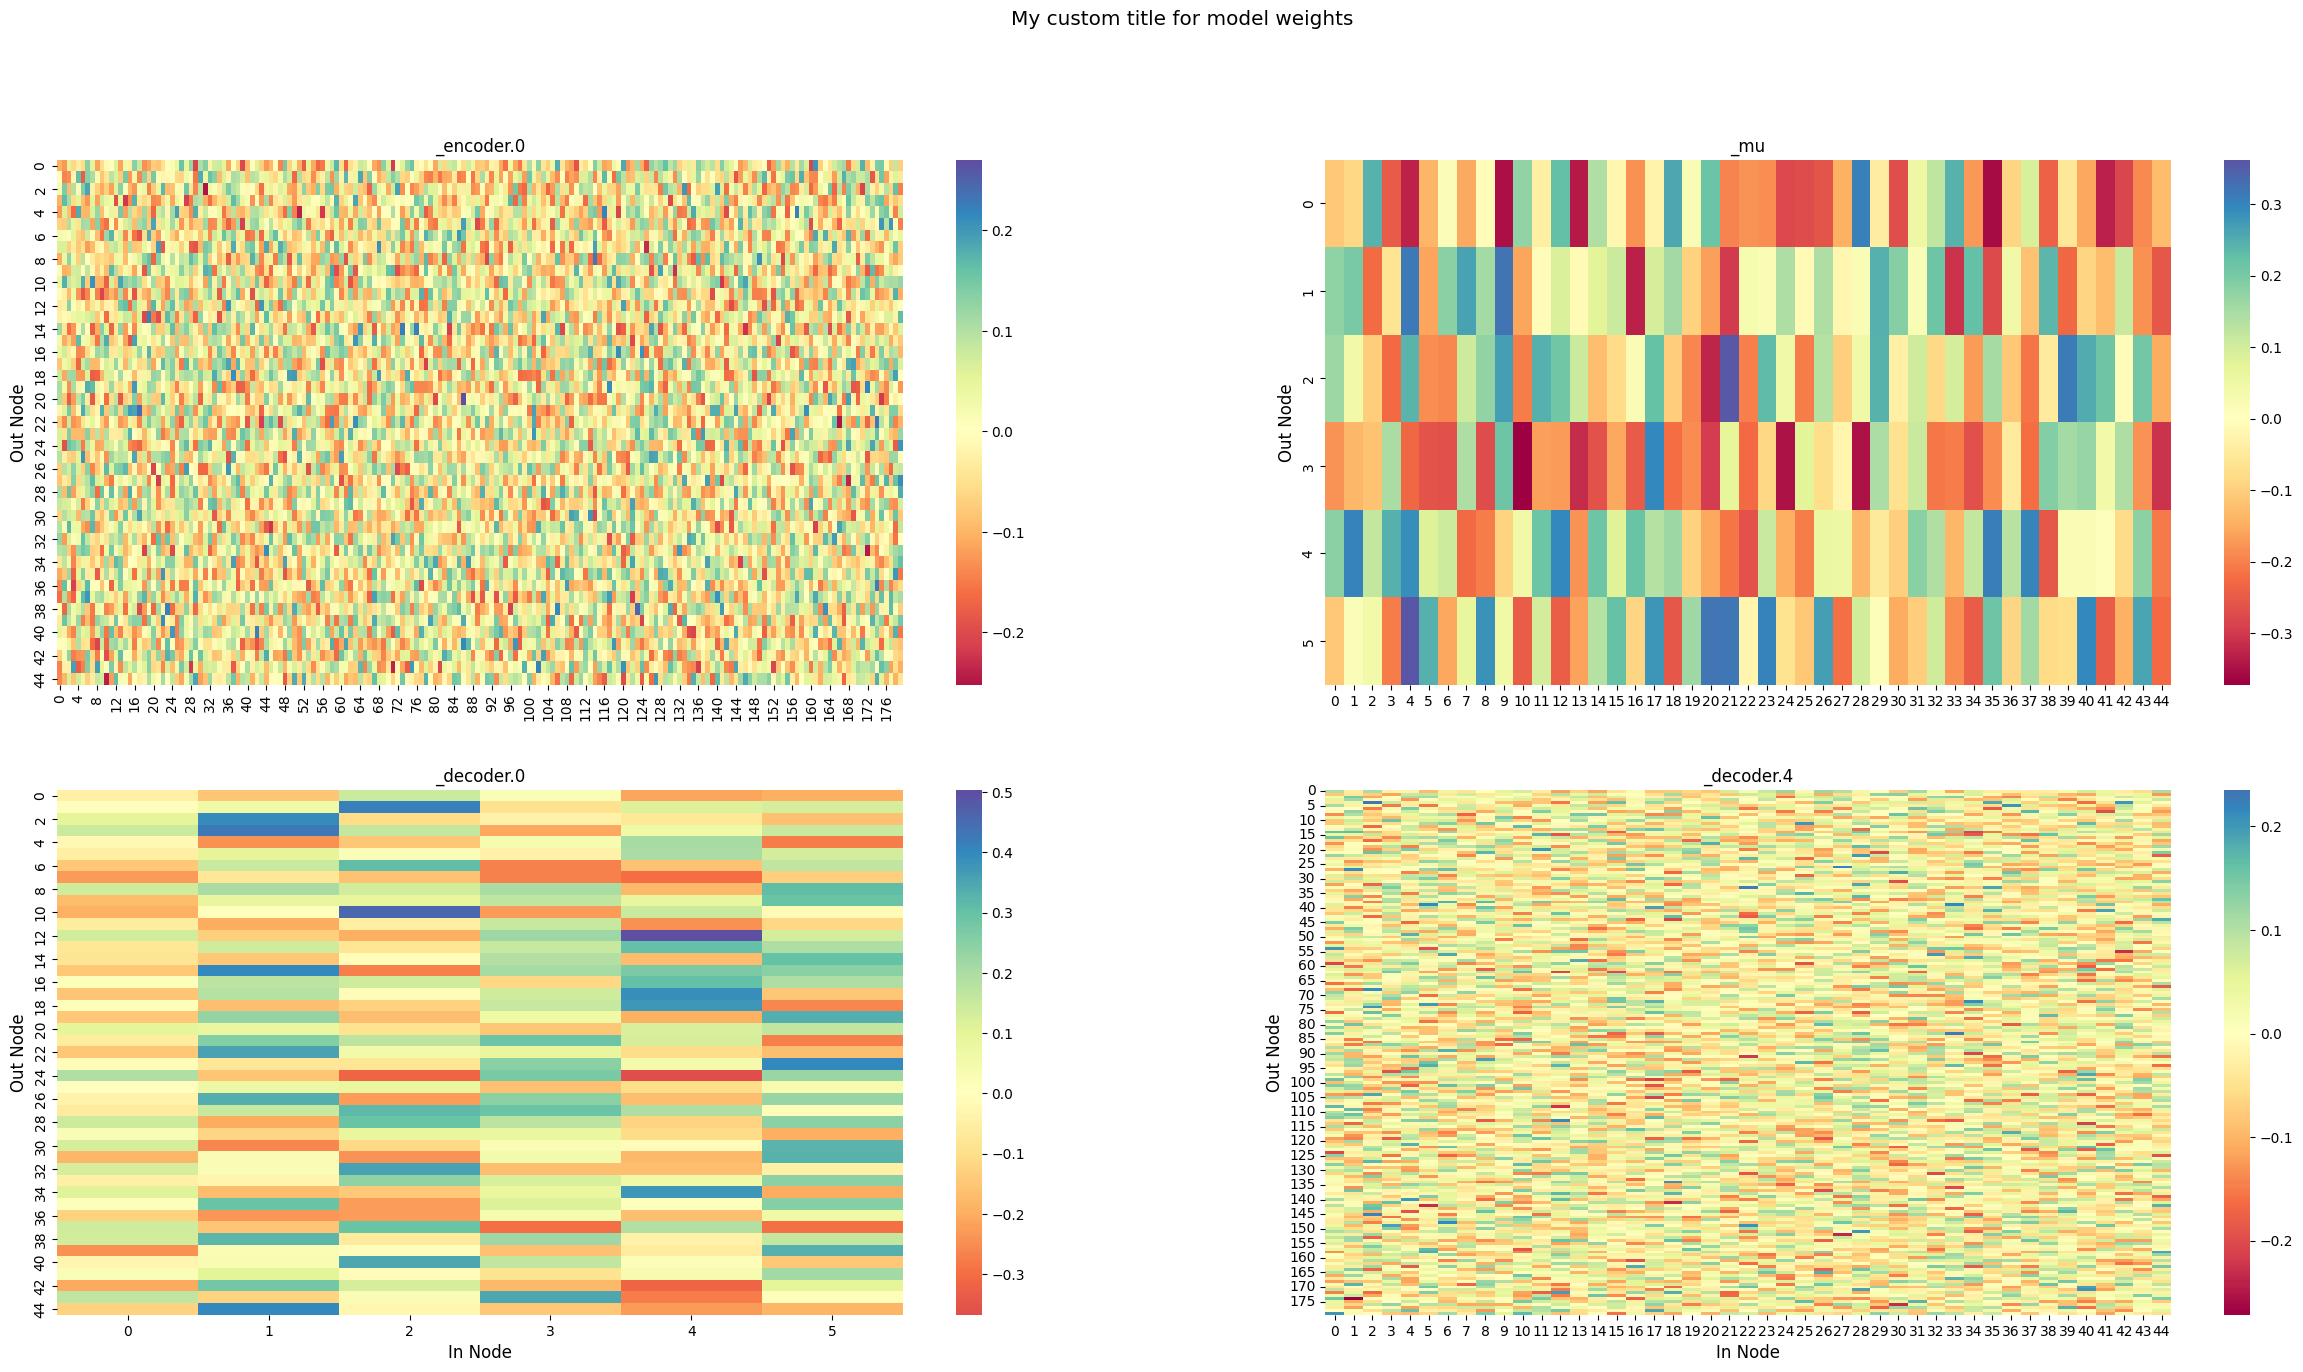

In [13]:
import matplotlib.pyplot as plt

fig_weights = disent.visualizer.plots["ModelWeights"]

# change the title
fig_weights.suptitle("My custom title for model weights")

fig_weights.figure

# 5. XModalix and Imagix specialities

XModalix and Imagix behave differently for some visualizations. This is related to the fact they are composed of multiple autoencoders (XModalix) and support images as data modality. 

## Differences in standard visualizations
- We do not provive a model weight visualization for more complex autoencoders (...yet...)
- Similarly, coverage and total correlation `Coverage-Correlation` is not supported (...yet...)
- Supported latent space visualizations are `Ridgeline` and `2D-scatter` and show each VAE as subplot
- Loss curves behave as before and are expanded to each loss term for complex autoencoders


## Additional plots for XModalix
At the core XModalix tries learn a joint latent space to enable translation across modalities. To check the capabilities of translation, we provide additional visualizations:

1. `xmodalix.visualizer.show_2D_translation()` - This plot compares on the test-split the `translated_modality` reconstruction by the XModalix with the original input in joint 2D repesentation calculated used a specified `reducer` method (default `UMAP`). A well trained XModalix and good translated modality (right plot) should as similar as possible to the original input (left plot). 
2. `xmodalix.visualizer.show_image_translation()` - For images as target modality of translation, translation capability can be checked by visual comparison of test samples, possibly across classes specified under `param`, from a) original b) translated `from_key` modality to `to_key` modality and c) reference reconstruction of the image VAE inside the XModalix.

For an example checkout the XModalix Tutorial

## Additional plot for Imagix

Analogously to XModalix, `imagix.visualizer.show_image_recon_grid()` provides a grid of test sample images showing a comparison of original images and reconstructed images by the Imagix.